In [1]:
import cv2 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import math
import glob
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns
#from sklearn import svm

In [2]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img1 = cv2.flip(img, 1)
        img2=cv2.flip(img,0)
        img3=cv2.flip(img,2)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        img1=np.array(255*(img1 / 255) ** 2, dtype = 'uint8')
        img2=np.array(255*(img2 / 255) ** 2, dtype = 'uint8')
        img3=np.array(255*(img3 / 255) ** 2, dtype = 'uint8')
        images.append(img)
        images.append(img1)
        images.append(img2)
        images.append(img3)
    images=np.array(images)
    
    return images

In [3]:
folder_positive=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpeg')
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpg'))
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.png'))

In [4]:
folder_positive

['/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (61).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (43).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (81).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (66).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (49).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (53).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (63).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (71).jpeg',
 '/home/srikanth/Downloads/drive

In [5]:
positive_img=liff(folder_positive,192,192)

In [6]:
folder_negative=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/Not_House/*.jpg')

In [7]:
negative_img=liff(folder_negative,192,192)

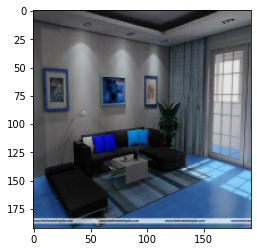

In [8]:
plt.imshow(positive_img[800])

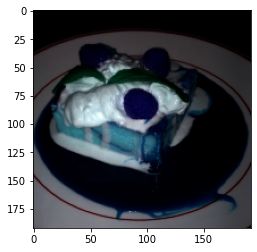

In [9]:
plt.imshow(negative_img[800])

In [10]:
pos_tar=[1]*(len(positive_img))

In [11]:
neg_tar=[0]*(len(negative_img))

In [12]:
img=np.concatenate([positive_img,negative_img])

In [13]:
target=np.concatenate([pos_tar,neg_tar])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

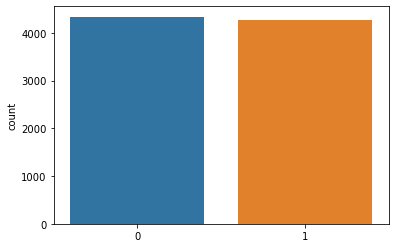

In [14]:

sns.countplot(target)

In [15]:
len(target)

8616

In [16]:
len(img)

8616

In [17]:
X_train, X_test, y_train, y_test = train_test_split(img, target, test_size=0.15, random_state=42)

In [18]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(192,192,3))
output = restnet.layers[-1].input
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, outputs=output)
for layer in restnet.layers:
    layer.trainable = False


In [19]:
model = Sequential()
model.add(restnet)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10, batch_size=150,verbose=1)

Epoch 1/10
49/49 [==============================] - 203s 4s/step - loss: 0.0693 - accuracy: 0.9288 - val_loss: 0.0248 - val_accuracy: 0.9745
Epoch 2/10
49/49 [==============================] - 207s 4s/step - loss: 0.0203 - accuracy: 0.9796 - val_loss: 0.0133 - val_accuracy: 0.9869
Epoch 3/10
49/49 [==============================] - 214s 4s/step - loss: 0.0304 - accuracy: 0.9695 - val_loss: 0.0190 - val_accuracy: 0.9814
Epoch 4/10
49/49 [==============================] - 216s 4s/step - loss: 0.0182 - accuracy: 0.9820 - val_loss: 0.0184 - val_accuracy: 0.9814
Epoch 5/10
49/49 [==============================] - 216s 4s/step - loss: 0.0144 - accuracy: 0.9853 - val_loss: 0.0187 - val_accuracy: 0.9807
Epoch 6/10
49/49 [==============================] - 205s 4s/step - loss: 0.0156 - accuracy: 0.9843 - val_loss: 0.0431 - val_accuracy: 0.9575
Epoch 7/10
49/49 [==============================] - 207s 4s/step - loss: 0.0196 - accuracy: 0.9804 - val_loss: 0.0213 - val_accuracy: 0.9783
Epoch 8/10
49

In [20]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
pred_train

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [21]:
def convert(p_t):
    temp=[]
    for i in range(len(p_t)):
        temp.append(p_t[i][0])
    p_t=temp
    for i in range(len(p_t)):
        if p_t[i]<0.5:
            p_t[i]=0
        else:
            p_t[i]=1
    return p_t
pred_train=convert(pred_train)
pred_test=convert(pred_test)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, pred_test)*100)
print(accuracy_score(y_train,pred_train)*100)
#sns.countplot(y_test,hue=pred_test)

98.83990719257541
99.05776321179845


In [23]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        images.append(img)
    images=np.array(images)
    
    return images

In [24]:
f=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpeg')
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpg'))
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.png'))

In [25]:
positive_img=liff(f,192,192)

In [26]:
pm=model.predict(positive_img)

In [27]:
pm=convert(pm)

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

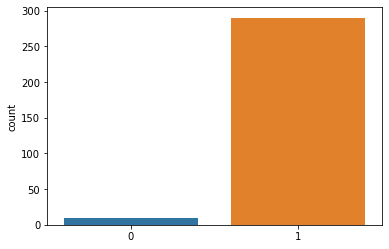

In [28]:
sns.countplot(pm)

In [29]:
f1=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpeg')
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpg'))
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.png'))

In [30]:
negative_img=liff(f1,192,192)

In [31]:
pm1=model.predict(negative_img)

In [32]:
pm1=convert(pm1)

In [33]:
def prin_conf(model_name,conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    print('the sensitivity of the'+model_name+' with dimensions is',conf_sensitivity*100)
    print('the specificity of the',model_name,' with dimensions is',conf_specificity*100)

In [34]:
pm2=np.concatenate([pm,pm1])

In [35]:
pos=[1]*len(pm)

In [36]:
neg=[0]*len(pm1)

In [37]:
tar=np.concatenate([pos,neg])

In [38]:
prin_conf(' 192*192',confusion_matrix(pm2,tar))

the sensitivity of the 192*192 with dimensions is 98.97610921501706
the specificity of the  192*192  with dimensions is 96.85314685314685


In [39]:
accuracy_score(pm2,tar)*100

97.92746113989638

In [41]:
model_json = model.to_json()
with open('model_192*192.json', "w") as json_file:
    json_file.write(model_json)
model.save_weights('model_192*192.h5')

In [41]:
from keras.models import load_model
from keras.models import model_from_json

In [42]:

json_file = open('models/model_192*192.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('models/model_192*192.h5')
